In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
in_desc = df.groupby("Outcome")["Insulin_nan"].describe()
in_desc

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [31]:
in_desc.loc[0, "50%"]

102.5

In [32]:

df["Insulin_filled"] = df["Insulin"] 

df.loc[(df["Insulin"] == 0) & (df["Outcome"] == 0), "Insulin_filled"] = in_desc.loc[0, "50%"]
df.loc[(df["Insulin"] == 0) & (df["Outcome"] == 1), "Insulin_filled"] = in_desc.loc[1, "50%"]

In [33]:
df.groupby("Outcome")["Insulin_filled"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,117.172000,75.685302,15.0,95.0,102.5,105.0,744.0
1,268.0,187.615672,94.114420,14.0,169.5,169.5,169.5,846.0


In [34]:
label_name = "Outcome"
label_name

'Outcome'

In [35]:
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names.remove("Insulin")
feature_names.remove("Insulin_nan")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Insulin_filled']

In [36]:
X = df[feature_names]
y = df[label_name]
X.shape, y.shape

((768, 8), (768,))

In [37]:
y.value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [39]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [40]:
y_train.value_counts(normalize=True) * 100

0    65.14658
1    34.85342
Name: Outcome, dtype: float64

In [41]:
y_test.value_counts(normalize=True) * 100

0    64.935065
1    35.064935
Name: Outcome, dtype: float64

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

In [43]:
max_depth_list = [2, 3, 5, 7, 9, 10]
max_depth_list

[2, 3, 5, 7, 9, 10]

In [44]:
np.random.uniform(0.2, 0.6, 10)

array([0.50928666, 0.59086521, 0.38119229, 0.31285214, 0.33153121,
       0.20593816, 0.46156747, 0.21082749, 0.26008811, 0.32217837])

In [45]:
max_features_list = [0.4, 0.5, 0.6]
max_features_list

[0.4, 0.5, 0.6]

In [46]:
# accuracy_list = []
# for max_depth in max_depth_list:
#     for max_features in max_features_list:
#         acc_list = []
#         model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, random_state=42)
#         y_predict = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1)
#         acc = (y_train == y_predict).mean()

#         acc_list.append(max_depth)
#         acc_list.append(max_features)
#         acc_list.append(acc)
#         accuracy_list.append(acc_list)

In [47]:
# df_acc = pd.DataFrame(accuracy_list, columns=["max_depth", "max_features", "accuracy"])
# df_acc.nlargest(5, "accuracy")

### GridSearch

In [48]:
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [49]:
max_depth_list = np.random.randint(2, 7, 10)
max_depth_list = np.unique(max_depth_list)
max_depth_list

array([2, 3, 4, 5, 6])

In [50]:
max_features_list = np.random.uniform(0.3, 0.7, 10)
max_features_list

array([0.56728996, 0.51134783, 0.69653449, 0.42456857, 0.6260449 ,
       0.66164295, 0.41119701, 0.36844371, 0.34354654, 0.51016516])

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': max_depth_list, 'max_features': max_features_list}

clf = GridSearchCV(model, param_grid=parameters, scoring="accuracy", n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
                         'max_features': array([0.56728996, 0.51134783, 0.69653449, 0.42456857, 0.6260449 ,
       0.66164295, 0.41119701, 0.36844371, 0.34354654, 0.51016516])},
             scoring='accuracy', verbose=2)

In [52]:
clf.best_score_

0.858296681327469

In [53]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=0.6965344890148182,
                       random_state=42)

In [66]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
1,0.002041,0.000165,0.000866,0.000109,0.651622,5,"{'max_features': 0.651622284323179, 'max_depth...",0.834951,0.815534,0.872549,0.892157,0.833333,0.911765,0.860048,0.034609,1
3,0.002235,0.000182,0.000968,0.000328,0.9752,6,"{'max_features': 0.9752000390468523, 'max_dept...",0.815534,0.796117,0.882353,0.872549,0.852941,0.872549,0.848674,0.032024,2
4,0.001807,0.000152,0.000761,0.000104,0.651622,4,"{'max_features': 0.651622284323179, 'max_depth...",0.815534,0.834951,0.882353,0.872549,0.843137,0.833333,0.846976,0.023236,3
0,0.002314,0.000991,0.000831,0.000145,0.9752,3,"{'max_features': 0.9752000390468523, 'max_dept...",0.834951,0.815534,0.823529,0.823529,0.823529,0.901961,0.837172,0.029521,4
2,0.001788,0.000210,0.000788,0.000095,0.751518,2,"{'max_features': 0.7515178865250518, 'max_dept...",0.834951,0.805825,0.852941,0.823529,0.803922,0.823529,0.824116,0.016790,5


### RandomSearchCV

In [55]:
max_depth_list = np.random.randint(2, 7, 10)
max_depth_list = np.unique(max_depth_list)
max_depth_list

array([4, 5, 6])

In [56]:
max_features_list = np.random.uniform(0.5, 0.98, 5)
max_features_list

array([0.80261466, 0.67465829, 0.87500349, 0.67657565, 0.5130428 ])

In [57]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.unique(np.random.randint(2, 7, 10)), 
                       "max_features": np.random.uniform(0.5, 0.98, 5)}
clf = RandomizedSearchCV(model, param_distributions, n_iter=5, cv=6, 
                         n_jobs=-1, verbose=2, random_state=42)
clf.fit(X_train, y_train)

Fitting 6 folds for each of 5 candidates, totalling 30 fits


RandomizedSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6]),
                                        'max_features': array([0.75151789, 0.65162228, 0.9651035 , 0.97520004, 0.7323394 ])},
                   random_state=42, verbose=2)

In [58]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.651622284323179,
                       random_state=42)

In [59]:
clf.best_score_

0.8600482264103052

In [60]:
pd.DataFrame(clf.cv_results_).nsmallest(5,"rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
1,0.002041,0.000165,0.000866,0.000109,0.651622,5,"{'max_features': 0.651622284323179, 'max_depth...",0.834951,0.815534,0.872549,0.892157,0.833333,0.911765,0.860048,0.034609,1
3,0.002235,0.000182,0.000968,0.000328,0.9752,6,"{'max_features': 0.9752000390468523, 'max_dept...",0.815534,0.796117,0.882353,0.872549,0.852941,0.872549,0.848674,0.032024,2
4,0.001807,0.000152,0.000761,0.000104,0.651622,4,"{'max_features': 0.651622284323179, 'max_depth...",0.815534,0.834951,0.882353,0.872549,0.843137,0.833333,0.846976,0.023236,3
0,0.002314,0.000991,0.000831,0.000145,0.9752,3,"{'max_features': 0.9752000390468523, 'max_dept...",0.834951,0.815534,0.823529,0.823529,0.823529,0.901961,0.837172,0.029521,4
2,0.001788,0.000210,0.000788,0.000095,0.751518,2,"{'max_features': 0.7515178865250518, 'max_dept...",0.834951,0.805825,0.852941,0.823529,0.803922,0.823529,0.824116,0.016790,5


## Best Estimator

In [61]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.651622284323179,
                       random_state=42)

In [62]:
y_predict = best_model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 1, 0])

In [63]:
best_model.feature_importances_

array([0.        , 0.09161989, 0.02397542, 0.04743783, 0.04948945,
       0.04578536, 0.06803543, 0.67365662])

<AxesSubplot:>

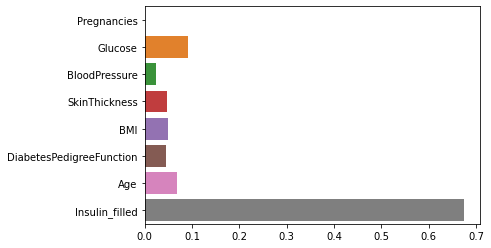

In [64]:
sns.barplot(x=best_model.feature_importances_, y=feature_names)

#### Accuracy

In [65]:
(y_test == y_predict).mean()

0.8441558441558441